# Create a bar plot in Python
by **Julian Laabs**

This is a small and fast example to create a bar plot with the data structure and data analysis tool of [pandas](https://pandas.pydata.org/). And it is a first try for me to design a small tuorial in [JupyterLab](https://github.com/jupyterlab). I assume here that Python, etc. is already installed. If not, check out the Python Distribution [Anaconda](https://www.anaconda.com/distribution/) and follow the install instructions there. Then you are ready to repeat the following lines of code and you should get the same results. 

## Import pandas and load a CSV file

Import the pandas package straightforward and rename it to pd. The only purpose behind the renaming is that one does not need to write the package's full name when calling specific functions.

In [1]:
import pandas as pd

As [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) will create an own index for an imported dataframe, we specify the index column as the grad_ID column of our dataset.

In [2]:
df = pd.read_csv("Zvejnieki/dataset_Zvejnieki.csv", index_col = 'grab_ID')
df.head()

,bestattungs_ID,grabnr_literatur,anzahl_bestattungen,laenge_grabgrube,breite_grabgrube,tiefe_grabgrube,grabbau,stoerung/erhaltung,biologisches_geschlecht,alter,...,zahn_Kleinsaeuger,zahn_Mensch,zahn_Baer,zahn_unbestimmt,knochen_Vogel,knochen_Bieber,knochen_unbestimmt,hufe,figur,schildkroetenpanzer
grab_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Grab 1,1,NaN,0.45,0.30,NaN,strak gestoert,unbest,erwachsen,...,0,0,0,0,0,0,0,0,0,0
2,2,Grab 2,1,1.8,0.40,0.35,NaN,NaN,m,erwachsen,...,0,0,0,0,0,0,0,0,0,0
3,3,Grab 3,1,NaN,0.50,0.40,kohleartige Einfuellung,wenig gestoert,unbest,erwachsen,...,0,0,0,0,0,0,0,0,0,0
4,4,Grab 4,1,1,0.80,0.45,kohleartige Einfuellung,strak gestoert,unbest,erwachsen,...,0,0,0,0,0,0,0,0,0,0
5,5,Grab 5,1,NaN,0.30,0.07,schwarze Kulturerde auf der Grabsohle,teilweise gestoert,unbest,infans,...,0,0,0,0,0,0,0,0,0,0


## Create a barplot

Pandas has inbuild functions to plot data from dataframes ([pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)). But beforehand we need to prepare the data a little more. In our case we would like to count the appearances of the biological sexes of the deceased in our dataset. Therefore, we use the [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function on the column 'biologisches_geschlecht' to do so. 

In [3]:
df['biologisches_geschlecht'].value_counts()

unbest    111
m          22
w           9
m?          2
w?          1
Name: biologisches_geschlecht, dtype: int64

Than we can plot directly.

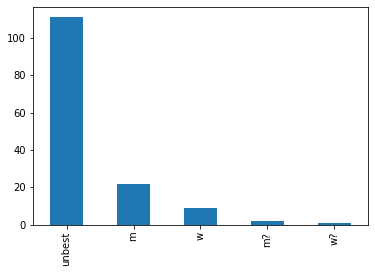

In [5]:
df['biologisches_geschlecht'].value_counts().plot(kind='bar')

## Plot the data (more respecable)

The [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) function has many arguments one can use to change the appearance of the data. We will use only some of them and you can find those an more in this [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

* figsize=(width, hight) determins the width and heigt of teh fiure in inch
* edgecolor will draw a line around the bars, what sets a nice contrast
* alpha sets the transparancy of the bars and the edgecolor
* rot rotates the x-axis labels by a given angle
* fontsize de-/increases the size of the x- and y-axis labels

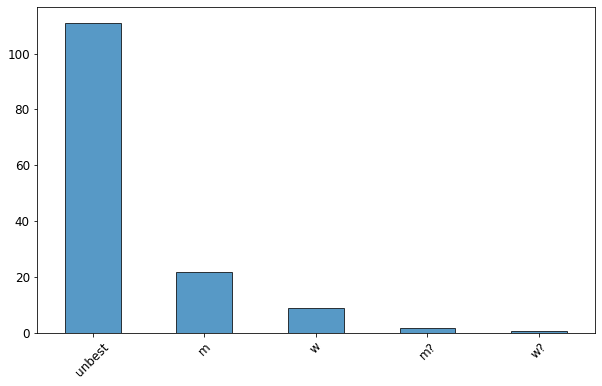

In [6]:
df['biologisches_geschlecht'].value_counts().plot(kind='bar', figsize=(10, 6), edgecolor = 'black', alpha = 0.75, rot = 45.0, fontsize = 12)

As the labels m, w, etc. are not really meaningful we should change them to proper words. We will there for overwrite specific values of column cells by a new value. This can also be done in the CSV spreadsheet directly. 

In [7]:
df.loc[df.biologisches_geschlecht == 'unbest', 'biologisches_geschlecht'] = 'indifferent'
df.loc[df.biologisches_geschlecht == 'm', 'biologisches_geschlecht'] = 'male'
df.loc[df.biologisches_geschlecht == 'w', 'biologisches_geschlecht'] = 'female'
df.loc[df.biologisches_geschlecht == 'm?', 'biologisches_geschlecht'] = ' uncertain male'
df.loc[df.biologisches_geschlecht == 'w?', 'biologisches_geschlecht'] = 'uncertain female'

And than plot again.

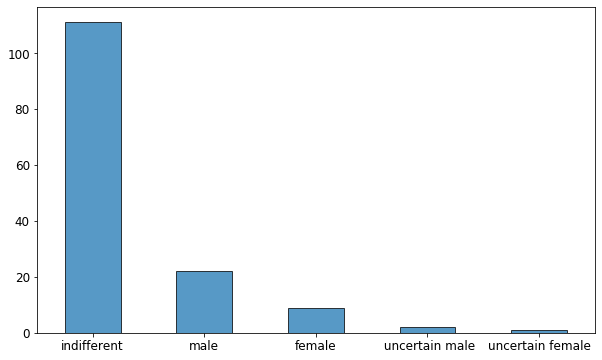

In [8]:
df['biologisches_geschlecht'].value_counts().plot(kind='bar', figsize=(10, 6), edgecolor = 'black', alpha = 0.75, rot = 0.0, fontsize = 12)

One last thing, to change the appearance of the plot in a fast way there is a convieniet option given by the package [matplotlib](https://matplotlib.org/). There are several plot styles which can be chosen from and will change the overall appearance of the plot. 

In [9]:
import matplotlib.pyplot as plt

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

We can call one of those styles and perform the plotting again to see what happens.

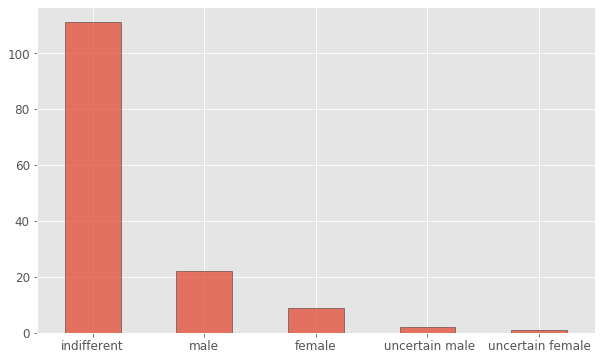

In [10]:
plt.style.use('ggplot')

df['biologisches_geschlecht'].value_counts().plot(kind='bar', figsize=(10, 6), edgecolor = 'black', alpha = 0.75, rot = 0.0, fontsize = 12)

Or another one.

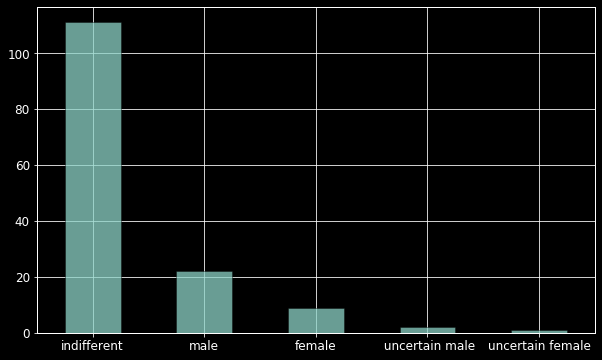

In [11]:
plt.style.use('dark_background')

df['biologisches_geschlecht'].value_counts().plot(kind='bar', figsize=(10, 6), edgecolor = 'black', alpha = 0.75, rot = 0.0, fontsize = 12)

This should be all. May try creating a bar plot with another column of the data set.